# Les graphiques avec Pandas

Plot twist : en fait pandas fourni un *wrapper* de matplotlib qui est bien plus simple d'utilisation  
On n'a pas fait tout ça pour rien, c'est intéressant de s'y pencher maintenant qu'on connais mieux matplotlib et ses capacités

C'est un peu moins paramétrable que d'utiliser matplotlib directement, mais c'est peut-être plus facile (et plus adapté forcément).

## Les bases

Ici, pas besoin d'importer matplotlib car il existe directement dans le module de pandas.

In [79]:
import pandas as p

Pour créer des graphe, on doit partir d'une DataFrame ou d'une Series et aller chercher la méthode désirée dans sa propriété `.plot`

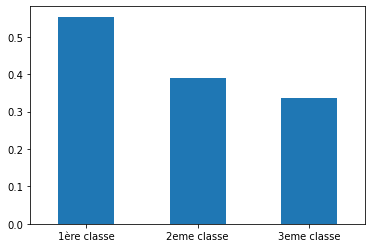

In [81]:
# On crée notre DataFrame avec nos données
titanic = p.read_csv("demo-pandas/titanic.csv")
survival_rate_by_embarkment = titanic.groupby(["Embarked"])["Survived"].mean()

# On renomme l'index avec des valeur unique
survival_rate_by_embarkment.index = ["1ère classe", "2eme classe", "3eme classe"]

# Et on utilise `.plot.bar()` pour afficher un graphique en barres
# le paramètre rot=0 permet de garder les labels à l'horizontale
survival_rate_by_embarkment.plot.bar(rot=0);

Pour avoir des valeurs groupées, on peut commencer par extraire nos données, puis créer un DataFrame de la bonne forme, spécifiquement pour notre graphique. 

             male     female
Pclass                      
1       36.885246  96.808511
2       15.740741  92.105263
3       13.583815  50.000000


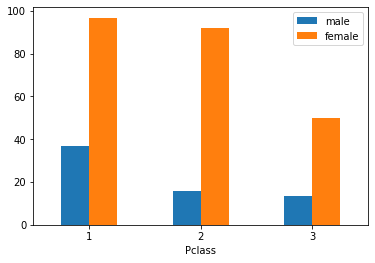

In [82]:
# On commence par récupérer nos deux jeux de données (hommes et femmes)
males = titanic[titanic["Sex"] == "male"]
females = titanic[titanic["Sex"] == "female"]

# On extrait nos informations, à savoir la moyenne de survie par classe
male_survival = males[["Pclass", "Survived"]].groupby("Pclass").mean()
female_survival = females[["Pclass", "Survived"]].groupby("Pclass").mean()

# On crée une nouvelle DataFrame comportant nos deux jeux de données
data = p.DataFrame({
    "male": male_survival["Survived"] * 100,
    "female": female_survival["Survived"] * 100,
})

# Je print pour qu'on puisse voir la forme de ce nouveau DataFrame
print(data)

# Et on affiche, pandas va gérer nos deux jeux automatiquement
axes = data.plot.bar(rot=0);

D'un coup c'est beaucoup plus simple d'obtenir des données groupées comme ça.

                      Fare   Cumulated
Embarked Pclass                       
C        1       8901.0750   8901.0750
         2        431.0917   9332.1667
         3        740.1295  10072.2962
Q        1        180.0000  10252.2962
         2         37.0500  10289.3462
         3        805.2043  11094.5505
S        1       8936.3375  20030.8880
         2       3333.7000  23364.5880
         3       5161.5863  28526.1743


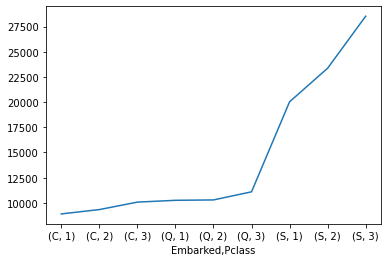

In [85]:
fare_by_embarkment = titanic[["Embarked", "Pclass", "Fare"]].groupby(["Embarked", "Pclass"]).sum()
fare_by_embarkment["Cumulated"] = fare_by_embarkment["Fare"].cumsum()

print(fare_by_embarkment)

fare_by_embarkment["Cumulated"].plot();

# 📝 A vous (5)

Ouvrez le fichier notebook dans le dossier `a-vous/a-vous-5.ipynb` et remplissez les blocs de code pour obtenir le résultat attendu.